In [4]:
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plot_configs

In [27]:
def load_and_plot_wandb_run(entity, project, run_id):
    """
    Load a W&B run and plot training metrics vs epochs.
    
    Args:
        entity (str): W&B entity name
        project (str): W&B project name  
        run_id (str): W&B run ID
    """
    
    # Initialize W&B API
    api = wandb.Api()
    
    # Get the run
    run_path = f"{entity}/{project}/{run_id}"
    print(f"Loading run: {run_path}")
    
    try:
        run = api.run(run_path)
        print(f"Run name: {run.name}")
        print(f"Run state: {run.state}")
        
        # Get the run history (metrics over time)
        history = run.history()
        print(f"History shape: {history.shape}")
        print(f"Available columns: {list(history.columns)}")
        
        # Define the metrics we want to plot
        metrics_to_plot = [
            "train/loss",
            "train/learning_rate", 
            "eval/loss",
            "train/grad_norm"
        ]
        
        # Check which metrics are available
        available_metrics = []
        for metric in metrics_to_plot:
            if metric in history.columns:
                available_metrics.append(metric)
                print(f"✓ Found metric: {metric}")
            else:
                print(f"✗ Missing metric: {metric}")
        
        if not available_metrics:
            print("No requested metrics found in the run history!")
            return
        
        # Check for epoch column
        epoch_col = None
        possible_epoch_cols = ["train/epoch", "epoch", "_step"]
        for col in possible_epoch_cols:
            if col in history.columns:
                epoch_col = col
                print(f"Using {col} as x-axis")
                break
        
        if epoch_col is None:
            print("No epoch column found, using index as x-axis")
            history['index'] = range(len(history))
            epoch_col = 'index'
        
        # Create subplots
        n_metrics = len(available_metrics)
        fig, axes = plt.subplots(2, 2, figsize=(6.5, 3.5))
        axes = axes.flatten()
        
        # Plot each metric
        for i, metric in enumerate(available_metrics):
            ax = axes[i]
            
            # Remove NaN values for plotting
            mask = ~(pd.isna(history[epoch_col]) | pd.isna(history[metric]))
            x_data = history[epoch_col][mask]
            y_data = history[metric][mask]
            
            ax.plot(x_data, y_data, linewidth=2, marker='o', markersize=1)
            ax.set_xlabel('Epoch' if 'epoch' in epoch_col.lower() else epoch_col, fontsize=8)
            ax.set_ylabel(metric, fontsize=8)
            
            # Set tick label font size to 6
            ax.tick_params(axis='both', which='major', labelsize=6)
            ax.tick_params(axis='both', which='minor', labelsize=6)
            
            # Add some basic statistics
            final_value = y_data.iloc[-1] if len(y_data) > 0 else 'N/A'
            ax.text(0.05, 0.95, f'Final: {final_value:.4f}' if isinstance(final_value, (int, float)) else f'Final: {final_value}',
                    transform=ax.transAxes, verticalalignment='top', fontsize=8,
                    bbox=dict(boxstyle='round', facecolor='lightgrey', alpha=0.8))
        
        # Hide unused subplots
        for i in range(n_metrics, len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.savefig('figures/AppB_a.png', dpi=300, transparent=True)
        plt.show()
        
    except Exception as e:
        print(f"Error loading run: {e}")
        print("Make sure you're logged into W&B and have access to this run.")
        return None

Loading run: chingfang17-harvard-university/llama_deepseek_finetune/tondu45a
Run name: olive-shadow-12
Run state: failed
Run name: olive-shadow-12
Run state: failed
History shape: (409, 12)
Available columns: ['train/grad_norm', 'train/global_step', '_step', '_timestamp', 'train/loss', 'eval/runtime', 'train/learning_rate', 'eval/steps_per_second', 'eval/samples_per_second', '_runtime', 'eval/loss', 'train/epoch']
✓ Found metric: train/loss
✓ Found metric: train/learning_rate
✓ Found metric: eval/loss
✓ Found metric: train/grad_norm
Using train/epoch as x-axis
History shape: (409, 12)
Available columns: ['train/grad_norm', 'train/global_step', '_step', '_timestamp', 'train/loss', 'eval/runtime', 'train/learning_rate', 'eval/steps_per_second', 'eval/samples_per_second', '_runtime', 'eval/loss', 'train/epoch']
✓ Found metric: train/loss
✓ Found metric: train/learning_rate
✓ Found metric: eval/loss
✓ Found metric: train/grad_norm
Using train/epoch as x-axis


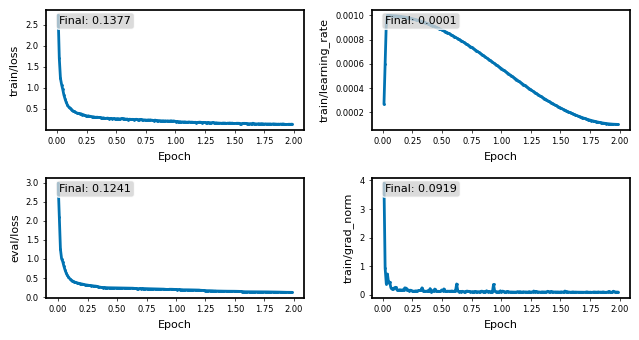

In [28]:
entity = "chingfang17-harvard-university"
project = "llama_deepseek_finetune"
run_id = "tondu45a"

# Load and plot the run
history = load_and_plot_wandb_run(entity, project, run_id)